<a href="https://colab.research.google.com/github/FilipNim/MKA-MLF/blob/main/MKA_MLF_Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MKA-MLF Miniproject

In [86]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances

import numpy as np
import matplotlib.pyplot as plt


## Import data

In [87]:
data = pd.read_csv("Data_prepared_final.csv")

In [88]:
data

,Unnamed: 0,time [s],cfo_meas,cfo_demod,gain_imb,iq_imb,or_off,quadr_err,ph_err,mag_err,evm
0,0,45181.524,-414,-421.076324,0.076097,-46.987598,-27.219631,0.104362,1.129778,0.440299,2.059935
1,1,45182.129,-414,-423.571686,0.069879,-47.852627,-26.934967,0.053158,1.050010,0.431240,1.815053
2,2,45182.550,-414,-421.033936,0.061466,-48.968697,-27.130722,-0.045913,0.989473,0.447790,1.762053
3,3,45182.971,-414,-420.103546,0.078836,-46.756973,-27.005318,0.081583,1.085091,0.443476,1.894204
4,4,45183.551,-432,-420.781097,0.066053,-47.048218,-27.358521,0.081920,1.023701,0.465225,1.805841
...,...,...,...,...,...,...,...,...,...,...,...
19195,19195,54245.724,216,215.584991,0.077551,-35.409054,-28.611925,1.875334,0.999375,1.427339,2.248822
19196,19196,54246.340,216,215.247406,0.044961,-35.508205,-27.954048,1.898758,1.031501,1.478366,2.320668
19197,19197,54246.770,216,216.761307,0.070066,-35.038486,-28.467575,2.015116,1.090227,1.468599,2.382019
19198,19198,54247.379,216,215.353516,0.048611,-35.413639,-28.528139,1.916172,0.999381,1.497681,2.283976


## Data Preprocessing

       cfo_meas   cfo_demod  gain_imb     iq_imb
0          -414 -421.076324  0.076097 -46.987598
1          -414 -423.571686  0.069879 -47.852627
2          -414 -421.033936  0.061466 -48.968697
3          -414 -420.103546  0.078836 -46.756973
4          -432 -420.781097  0.066053 -47.048218
...         ...         ...       ...        ...
19195       216  215.584991  0.077551 -35.409054
19196       216  215.247406  0.044961 -35.508205
19197       216  216.761307  0.070066 -35.038486
19198       216  215.353516  0.048611 -35.413639
19199       216  215.797363  0.063049 -35.693104

[19200 rows x 4 columns]


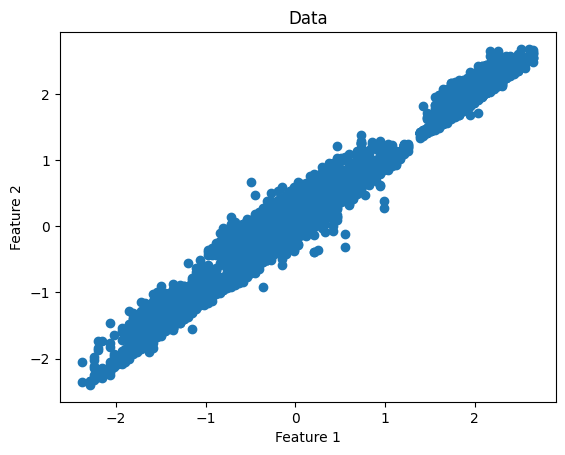

In [89]:
data = data.drop(data.columns[[0, 1]], axis=1)
data = data.drop(columns=['or_off','quadr_err', 'ph_err', 'mag_err','evm'])

print(data)
data = StandardScaler().fit_transform(data)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [90]:
data

array([[-0.10218242, -0.11905909,  0.68430902, -2.18452544],
       [-0.10218242, -0.12510636,  0.55147287, -2.34474749],
       [-0.10218242, -0.11895637,  0.3717129 , -2.55146785],
       ...,
       [ 1.42819676,  1.42668032,  0.55546696,  0.02870965],
       [ 1.42819676,  1.42326867,  0.09704912, -0.04077676],
       [ 1.42819676,  1.4243443 ,  0.40553964, -0.09253969]])

## Optimization of constants min_samples and epsilon


(19100.0, 19200.0)

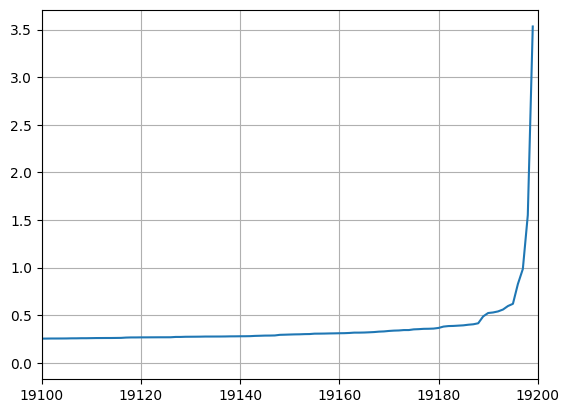

In [91]:
neighbors = NearestNeighbors(n_neighbors=8)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.grid()
plt.xlim([19100, 19200])

## Model building and results

Number of transmitters: 2


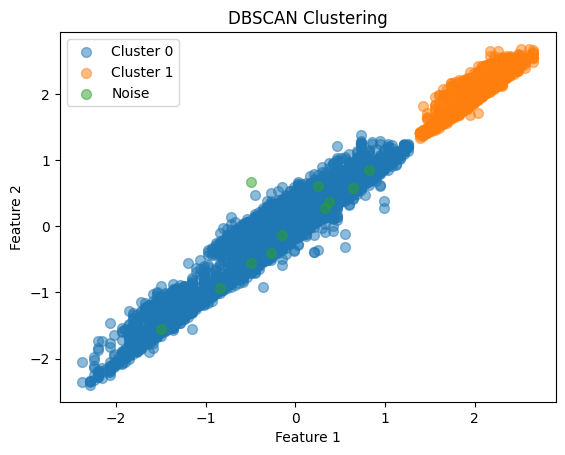

In [92]:
epsilon = 0.5
min_samples = 8
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
dbscan.fit(data)

clusters = dbscan.labels_

num_transmitters = len(set(clusters))- (1 if -1 in clusters else 0)
print("Number of transmitters:", num_transmitters)

unique_clusters = set(clusters)

legend_labels = {}

for cluster in unique_clusters:
    if cluster == -1:
        label = 'Noise'
    else:
        label = f'Cluster {cluster}'
    cluster_data = data[clusters == cluster]
    plt.scatter(cluster_data[:, 0],
                cluster_data[:, 1],
                label=label,
                marker='o',
                s=50,
                alpha=0.5)

    legend_labels[cluster] = label

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(labels=legend_labels.values())
plt.show()